In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 확률밀도함수
from scipy.stats import norm

# 최적화
from scipy.optimize import minimize

# 실습예제 2
- 지수 로그 함수 사용

In [ ]:
rawData = np.load('/content/drive/MyDrive/멀티캠퍼스/data/moore.npz')
x=rawData['X']
y=rawData['y']

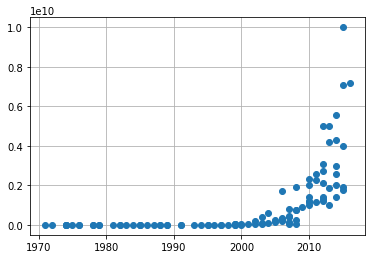

In [ ]:
plt.plot(x, y, 'o')
plt.grid()
plt.show()

지수 로그함수 사용

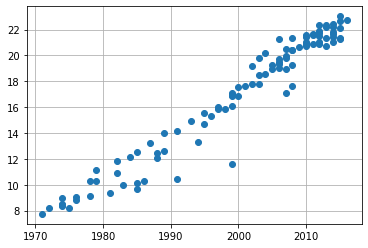

In [ ]:
logY = np.log(y)
plt.plot(x, logY, 'o')
plt.grid()
plt.show()

In [ ]:
def error(beta):
  yhat = beta[0] + beta[1] * x
  return np.sum( (logY - yhat) ** 2 )

def grad_b0(beta):
  return np.sum(-2 * x * (-beta[1] * x - beta[0] + logY))

def grad_b1(beta):
  return np.sum(2 * beta[1] * x + 2 * beta[0] - 2 * logY)

In [ ]:
beta = [ 0, 0 ]
result = minimize( error, beta )
result.x

array([-6.84654467e+02,  3.50870636e-01])

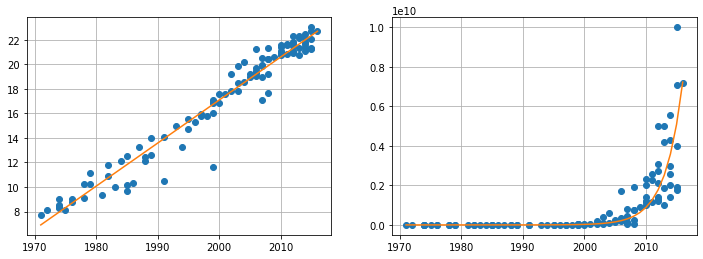

In [ ]:
w = result.x
plt.figure( figsize=(12,4) )

plt.subplot(1, 2, 1)
plt.plot(x, logY, 'o')
plt.plot(x, w[0] + w[1] * x )
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y, 'o')
plt.plot(x, np.exp(w[0] + w[1] * x) )
plt.grid()

plt.show()

# 일반화선형모형

In [ ]:
from sklearn import datasets

In [ ]:
x, y = datasets.make_classification(
  n_samples = 6, n_features= 2, n_classes=2, random_state=25,
  n_informative=1, n_redundant=0, n_clusters_per_class=1,
) # y는 클래스가 2개라 0 아니면 1값 가짐

In [ ]:
np.c_[y,x]

array([[ 1.        , -0.23231186,  1.07376638],
       [ 1.        , -1.33466147,  1.02774133],
       [ 1.        ,  2.1529569 ,  1.11939849],
       [ 0.        , -0.92073444, -1.31059391],
       [ 0.        , -2.05323076, -0.91555323],
       [ 0.        ,  0.86858305, -0.62011478]])

In [ ]:
sample=pd.DataFrame(np.c_[y,x],columns=['y','x1','x2'])
sample
#y가 범주형

,y,x1,x2
0,1.0,-0.232312,1.073766
1,1.0,-1.334661,1.027741
2,1.0,2.152957,1.119398
3,0.0,-0.920734,-1.310594
4,0.0,-2.053231,-0.915553
5,0.0,0.868583,-0.620115


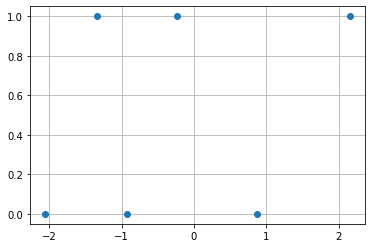

In [ ]:
plt.plot(sample['x1'],sample['y'],'o')
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(sample[['x1']],sample['y'])

LinearRegression()

In [ ]:
model.coef_

array([0.11304748])

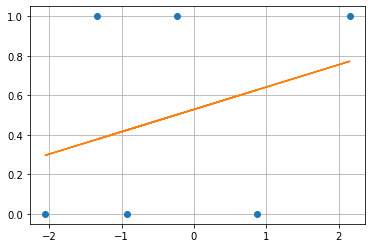

In [ ]:
plt.plot(sample['x1'],sample['y'],'o')
plt.plot(sample['x1'],model.predict(sample[['x1']]))
plt.grid()
plt.show()
# 의미가 없음

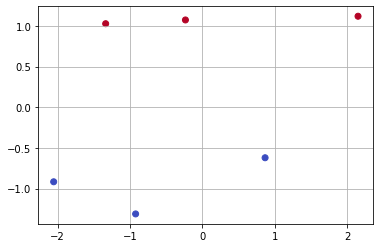

In [ ]:
plt.scatter(sample['x1'],sample['x2'],c=sample['y'],cmap='coolwarm')
plt.grid()

plt.show()
# 0파란색 1빨간색
# 분류모형

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(sample[['x1', 'x2']],sample['y'])

LogisticRegression()

In [ ]:
pd.DataFrame(np.c_[y,model.predict_proba(sample[['x1','x2']])],columns=['y','0','1'])
#y가 0일 확률과 1일 확률을 나타냄

,y,0,1
0,1.0,0.224322,0.775678
1,1.0,0.265428,0.734572
2,1.0,0.160384,0.839616
3,0.0,0.861946,0.138054
4,0.0,0.819000,0.181000
5,0.0,0.668922,0.331078


## 선형회귀 일반화
- 베르누이 분포를 따르고 있는 상황
- 정규분포를 따를 수 있게끔,,

누적분포함수 사용 = logit 함수

In [ ]:
def logit(x):
  return 1 / (1 + np.exp(-x))

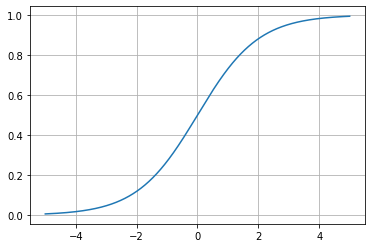

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, logit(x))
plt.grid()
plt.show()